In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def getAcc_Loss(path, epoch):
    file = open(path, "r")
    
    # this will store the train and validation accuracy and loss
    train_acc = []
    train_loss = []
    val_acc = []
    val_loss = []
    
    # get the result for plotting
    for i, line in enumerate(file):
        if i < 2:
            continue
        elif i < 2 + epoch:
            result = [float(r) for r in line.split("$")]
            train_acc.append(result[0])
            train_loss.append(result[1])
        elif i == 2 + epoch:
            continue
        elif i == epoch * 2 + 3:
            continue
        else:
            result = [float(r) for r in line.split("$")]
            val_acc.append(result[0])
            val_loss.append(result[1])
    
    file.close()
    
    return (train_acc, train_loss, val_acc, val_loss)

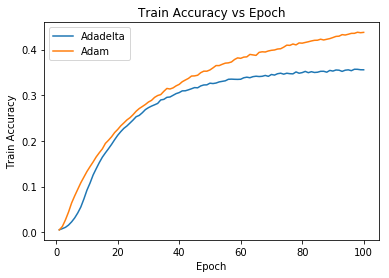

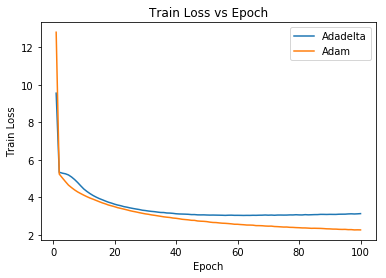

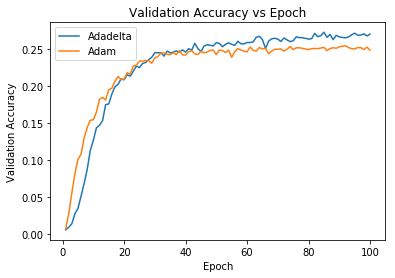

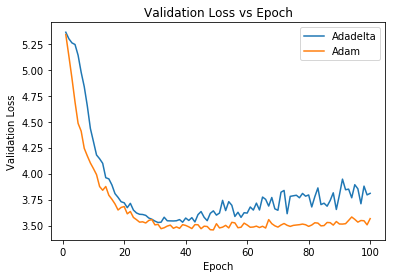

In [13]:
# plot for VGG-like
epoch = 100
yAxis = range(1, epoch+1)

# get the results
adadeltaResult = getAcc_Loss("./Results/VGG-like Adadelta.txt",  epoch)
adamResult = getAcc_Loss("./Results/VGG-like Adam.txt",  epoch)

# plot train accuracy vs epoch

for i in range(4):
    plt.plot(yAxis, adadeltaResult[i], label = 'Adadelta')
    plt.plot(yAxis, adamResult[i], label = 'Adam')

    yAxisLabel = {
        0: "Train Accuracy",
        1: "Train Loss",
        2: "Validation Accuracy",
        3: "Validation Loss"
    }
    
    plt.xlabel('Epoch')
    myTitle = yAxisLabel[i]
    plt.ylabel(myTitle)
    plt.title("%s vs Epoch" % (myTitle))
    plt.legend(loc='best')
    plt.savefig("./Plots/%s vs Epoch.png" % (myTitle))
    plt.show()